<a href="https://colab.research.google.com/github/Rounak-Das-02/ML_Project/blob/master/model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
#Loading data
from google.colab import files
uploaded = files.upload() ## Uploading from local.


Saving vehiclesFinal.csv to vehiclesFinal.csv


In [54]:
import io
df = pd.read_csv(io.BytesIO(uploaded['vehiclesFinal.csv'])) ## Code snippet copied from Google
df.head()


,id,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,lat,long,price
0,7119256118,mohave county,2012.0,jeep,patriot,like new,4 cylinders,gas,247071.0,clean,automatic,4wd,full-size,offroad,silver,34.4554,-114.2690,3495
1,7120880186,oregon coast,2014.0,bmw,328i m-sport,good,5 cylinders,gas,76237.0,clean,automatic,rwd,full-size,sedan,grey,46.1837,-123.8240,13750
2,7115048251,greenville / upstate,2001.0,dodge,caravan,excellent,6 cylinders,gas,199000.0,clean,automatic,4wd,full-size,offroad,grey,34.9352,-81.9654,2300
3,7119250502,mohave county,2004.0,chevrolet,colorado ls,excellent,5 cylinders,gas,54000.0,clean,automatic,rwd,mid-size,pickup,red,34.4783,-114.2710,9000
4,7120430837,maine,2005.0,ford,mustang convertible,excellent,6 cylinders,gas,62800.0,clean,automatic,rwd,mid-size,convertible,silver,44.2070,-69.7858,8500


In [55]:
test = df[4:5]
test

,id,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,lat,long,price
4,7120430837,maine,2005.0,ford,mustang convertible,excellent,6 cylinders,gas,62800.0,clean,automatic,rwd,mid-size,convertible,silver,44.207,-69.7858,8500


In [56]:
df.shape

(374222, 18)

In [57]:
df.columns

Index(['id', 'region', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'size', 'type', 'paint_color', 'lat', 'long', 'price'],
      dtype='object')

In [58]:
df2 = df.sample(500)
df2.shape

(500, 18)

# DATA VISUALIZATION:

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

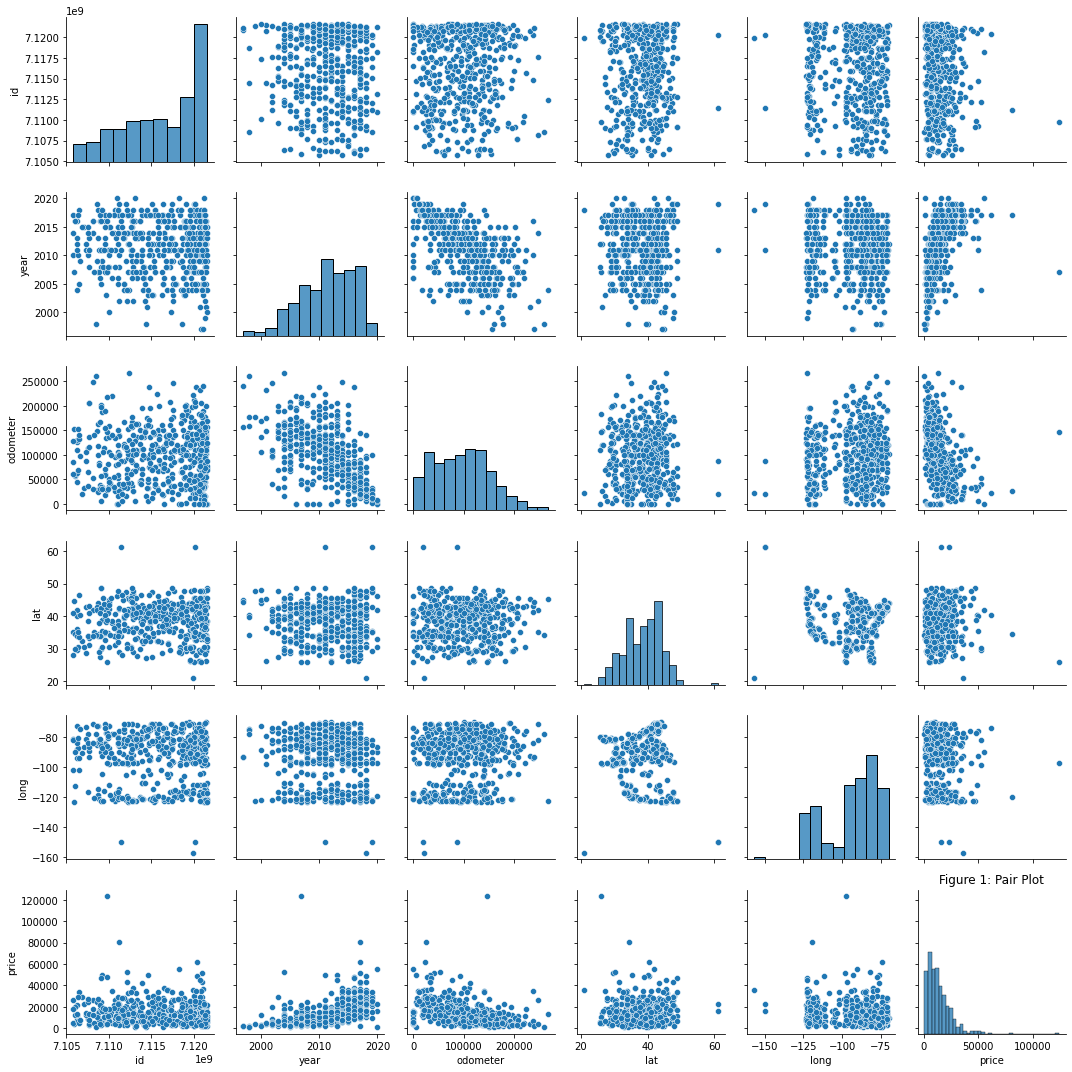

In [60]:
sns.pairplot(df2)
plt.title('Figure 1: Pair Plot')
plt.tight_layout()
plt.show()

# MODEL IMPLEMENTATIONS:

In [61]:
import time
from tqdm import tqdm

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import r2_score,mean_squared_error


In [62]:
df=df.drop('id',axis=1)

df3=df.copy()
df.head()

,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,lat,long,price
0,mohave county,2012.0,jeep,patriot,like new,4 cylinders,gas,247071.0,clean,automatic,4wd,full-size,offroad,silver,34.4554,-114.2690,3495
1,oregon coast,2014.0,bmw,328i m-sport,good,5 cylinders,gas,76237.0,clean,automatic,rwd,full-size,sedan,grey,46.1837,-123.8240,13750
2,greenville / upstate,2001.0,dodge,caravan,excellent,6 cylinders,gas,199000.0,clean,automatic,4wd,full-size,offroad,grey,34.9352,-81.9654,2300
3,mohave county,2004.0,chevrolet,colorado ls,excellent,5 cylinders,gas,54000.0,clean,automatic,rwd,mid-size,pickup,red,34.4783,-114.2710,9000
4,maine,2005.0,ford,mustang convertible,excellent,6 cylinders,gas,62800.0,clean,automatic,rwd,mid-size,convertible,silver,44.2070,-69.7858,8500


In [63]:
#defining numerical and categorical values

num_col=['year','odometer','long','lat']

cat_cols=['region','manufacturer','model','condition','cylinders','fuel',
          'title_status','transmission','drive','size','type','paint_color']

In [64]:
# Encoding categorical columns.
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
d = defaultdict(LabelEncoder)
fit = df[cat_cols].apply(lambda x : d[x.name].fit_transform(x)) ## Fit transforming
# fit.apply(lambda x: d[x.name].inverse_transform(x))
df[cat_cols] = df[cat_cols].apply(lambda x : d[x.name].transform(x))
# le=LabelEncoder()
# df[cat_cols]=df[cat_cols].apply(le.fit_transform)

In [65]:
df.head()

,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,lat,long,price
0,220,2012.0,19,20087,3,3,2,247071.0,0,0,0,1,6,9,34.4554,-114.2690,3495
1,258,2014.0,4,2438,2,4,2,76237.0,0,0,2,1,9,5,46.1837,-123.8240,13750
2,131,2001.0,9,9105,0,5,2,199000.0,0,0,0,1,6,5,34.9352,-81.9654,2300
3,220,2004.0,7,9929,0,4,2,54000.0,0,0,2,2,8,8,34.4783,-114.2710,9000
4,202,2005.0,12,19107,0,5,2,62800.0,0,0,2,2,2,9,44.2070,-69.7858,8500


In [66]:
import joblib
joblib.dump(d, "categorical_encoder_dict.joblib")
joblib.dump(fit, "categorical_encoder.joblib") ## Just in case

['categorical_encoder.joblib']

In [67]:
dic = joblib.load("/content/categorical_encoder_dict.joblib")

In [68]:
test[cat_cols] = test[cat_cols].apply(lambda x : dic[x.name].transform(x))

In [69]:
test

,id,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,lat,long,price
4,7120430837,202,2005.0,12,19107,0,5,2,62800.0,0,0,2,2,2,9,44.207,-69.7858,8500


In [70]:
# Scaling Numerical columns

norm = StandardScaler()
df['odometer'] = norm.fit_transform(np.array(df['odometer']).reshape(-1,1))
df['year'] = norm.fit_transform(np.array(df['year']).reshape(-1,1))
df['model'] = norm.fit_transform(np.array(df['model']).reshape(-1,1))


df['region'] = norm.fit_transform(np.array(df['region']).reshape(-1,1))
df['lat'] = norm.fit_transform(np.array(df['lat']).reshape(-1,1))
df['long'] = norm.fit_transform(np.array(df['long']).reshape(-1,1))

In [71]:
df.head()

,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,lat,long,price
0,0.256987,0.157474,19,0.617681,3,3,2,2.611323,0,0,0,1,6,9,-0.658871,-1.079769,3495
1,0.583284,0.537358,4,-1.808705,2,4,2,-0.403124,0,0,2,1,9,5,1.267242,-1.610779,13750
2,-0.507234,-1.931885,9,-0.892125,0,5,2,1.763088,0,0,0,1,6,5,-0.580075,0.715472,2300
3,0.256987,-1.362060,7,-0.778842,0,4,2,-0.795506,0,0,2,2,8,8,-0.655111,-1.079880,9000
4,0.102426,-1.172118,12,0.482951,0,5,2,-0.640226,0,0,2,2,2,9,0.942613,1.392341,8500


Splitting data into test and train datasets

In [72]:
from sklearn.model_selection import train_test_split

n = list(range(len(list(df.columns))-1))
X = df.iloc[:,n]
y = df.iloc[:,-1:].values.T
y=y[0]

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,
                                                    test_size=0.2,random_state=42)

In [73]:
#some of models will predict neg values so this function will remove that values
def remove_neg(y_test,y_pred):
    ind=[index for index in range(len(y_pred)) if(y_pred[index]>0)]
    y_pred=y_pred[ind]
    y_test=y_test[ind]
    y_pred[y_pred<0]
    return (y_test,y_pred)

#function for evaluation of model
def result(y_test,y_pred):
    r=[]
    r.append(mean_squared_log_error(y_test, y_pred))
    r.append(np.sqrt(r[0]))
    r.append(r2_score(y_test,y_pred))
    r.append(round(r2_score(y_test,y_pred)*100,4))
    return (r)

#dataframe that store the performance of each model
accu=pd.DataFrame(index=['MSLE', 'Root MSLE', 'R2 Score','Accuracy(%)'])    

# SIMPLER MODELS

In [21]:
import time
import matplotlib
from sklearn.metrics import mean_squared_log_error,r2_score,mean_squared_error


1. Linear regression

In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
LR = LinearRegression()
LR.fit(X_train,y_train)
y_pred=LR.predict(X_test)

In [65]:
y_test_1,y_pred_1=remove_neg(y_test,y_pred)
r1_lr=result(y_test_1,y_pred_1)

print('Coefficients: \n', LR.coef_)
print("MSLE : {}".format(r1_lr[0]))
print("Root MSLE : {}".format(r1_lr[1]))
print("R2 Score : {} or {}%".format(r1_lr[2],r1_lr[3]))
accu['Linear Regression']=r1_lr


Coefficients: 
 [-0.00240206  0.41084887 -0.00048152  0.00049764 -0.02314021  0.18633976
 -0.24255281 -0.20177816 -0.0763671   0.07486604 -0.09274472 -0.02754701
 -0.00141668  0.00406738  0.01719698 -0.06149138]
MSLE : 0.0024442162117526986
Root MSLE : 0.04943901507668512
R2 Score : 0.5955678395786822 or 59.5568%


In [67]:
accu.to_csv('errors.csv')

In [59]:
from sklearn import metrics
print('Root mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test_1,y_pred_1)))

Root mean Squared Error:  0.4939742158824665


2. Ridge regression

In [25]:
from sklearn.linear_model import Ridge, RidgeCV

In [27]:
Ridge_Regression = Ridge()
Ridge_Regression.fit(X_train, y_train)
y_pred = Ridge_Regression.predict(X_test)

In [28]:
y_test_2, y_pred_2 = remove_neg(y_test,y_pred)
r2_ridge = result(y_test_2,y_pred_2)

print("MSLE : {}".format(r2_ridge[0]))
print("Root MSLE : {}".format(r2_ridge[1]))
print("R2 Score : {} or {}%".format(r2_ridge[2],r2_ridge[3]))
accu['Ridge Regression']=r2_ridge


MSLE : 0.002444218156945417
Root MSLE : 0.04943903474932957
R2 Score : 0.5955673581471799 or 59.5567%


3. Lasso Regression

In [29]:
from sklearn.linear_model import Lasso, LassoCV

In [30]:
lasso=Lasso(alpha=0.0001)
lasso.fit(X_train,y_train)
y_pred=lasso.predict(X_test)

In [68]:
y_test_3, y_pred_3 = remove_neg(y_test,y_pred)
r3_lasso = result(y_test_3,y_pred_3)

print("MSLE : {}".format(r3_lasso[0]))
print("Root MSLE : {}".format(r3_lasso[1]))
print("R2 Score : {} or {}%".format(r3_lasso[2],r3_lasso[3]))
accu['Lasso Regression']=r3_lasso

MSLE : 0.0024442162117526986
Root MSLE : 0.04943901507668512
R2 Score : 0.5955678395786822 or 59.5568%


4. KNN

In [32]:
from sklearn.neighbors import KNeighborsRegressor

In [33]:
#estimating MSLE for k=1-9
R_MSLE=[]
for i in range(1,10):
    KNN=KNeighborsRegressor(n_neighbors=i)
    KNN.fit(X_train,y_train)
    y_pred=KNN.predict(X_test)
    error=np.sqrt(mean_squared_log_error(y_test, y_pred))
    R_MSLE.append(error)
    print("K =",i," , Root MSLE =",error)


K = 1  , Root MSLE = 0.0426578117418555
K = 2  , Root MSLE = 0.03924836309971968
K = 3  , Root MSLE = 0.038385981026102196
K = 4  , Root MSLE = 0.03817065894015624
K = 5  , Root MSLE = 0.038139897132037776
K = 6  , Root MSLE = 0.038207852204206
K = 7  , Root MSLE = 0.0383267748408071
K = 8  , Root MSLE = 0.03843377967700702
K = 9  , Root MSLE = 0.03861385354009933


In [35]:
KNN=KNeighborsRegressor(n_neighbors=5) ## Using k = 5, since it has least error
KNN.fit(X_train,y_train)
y_pred=KNN.predict(X_test)

In [36]:
#model evaluation
r4_knn=result(y_test,y_pred)
print("MSLE : {}".format(r4_knn[0]))
print("Root MSLE : {}".format(r4_knn[1]))
print("R2 Score : {} or {}%".format(r4_knn[2],r4_knn[3]))
accu['KNN']=r4_knn

MSLE : 0.0014546517532424235
Root MSLE : 0.038139897132037776
R2 Score : 0.765095455068974 or 76.5095%


In [69]:
accu.to_csv('errors.csv')

5. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
regressor = RandomForestRegressor(n_estimators=200,random_state=0, min_samples_leaf=1,
                                  max_features=0.5, n_jobs=-1, oob_score=True) ## Will have to tune hyper parameters more. Grid Search CV was too time consuming, hence we decided to go with some defaults
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)

In [ ]:
r5_rf=result(y_test,y_pred)
print("MSLE : {}".format(r5_rf[0]))
print("Root MSLE : {}".format(r5_rf[1]))
print("R2 Score : {} or {}%".format(r5_rf[2],r5_rf[3]))
accu['RandomForest Regressor']=r5_rf


6. XGBoost

In [38]:
import xgboost as xgb

In [39]:
#model implementation and fitting data
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror',
                max_depth = 24, alpha = 5, n_estimators = 200)
xg_reg.fit(X_train,y_train)
y_pred = xg_reg.predict(X_test)

In [40]:
#model evaluation
y_test_1,y_pred_1=remove_neg(y_test,y_pred)
r8_xg=result(y_test_1,y_pred_1)
print("MSLE : {}".format(r8_xg[0]))
print("Root MSLE : {}".format(r8_xg[1]))
print("R2 Score : {} or {}%".format(r8_xg[2],r8_xg[3]))


MSLE : 0.0006309681231077254
Root MSLE : 0.025119078866624973
R2 Score : 0.9015851843614826 or 90.1585%


In [70]:
accu['XGBoost Regressor']=r8_xg
accu.to_csv('errors.csv')

In [43]:
from sklearn import metrics 
print('Root mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test_1,y_pred_1)))

Root mean Squared Error:  0.24367539596889728


# Saving Model:

In [44]:
import pickle
with open("models.pkl", "wb") as file: 
  pickle.dump(xg_reg,file) 

# Results:

In [71]:
accu=pd.read_csv('./errors.csv',index_col=0)
accu

,Linear Regression,Ridge Regression,Lasso Regression,KNN,XGBoost Regressor
MSLE,0.002444,0.002444,0.002444,0.001455,0.000631
Root MSLE,0.049439,0.049439,0.049439,0.038140,0.025119
R2 Score,0.595568,0.595567,0.595568,0.765095,0.901585
Accuracy(%),59.556800,59.556700,59.556800,76.509500,90.158500


In [72]:
model_accuracy=accu.loc['Accuracy(%)']

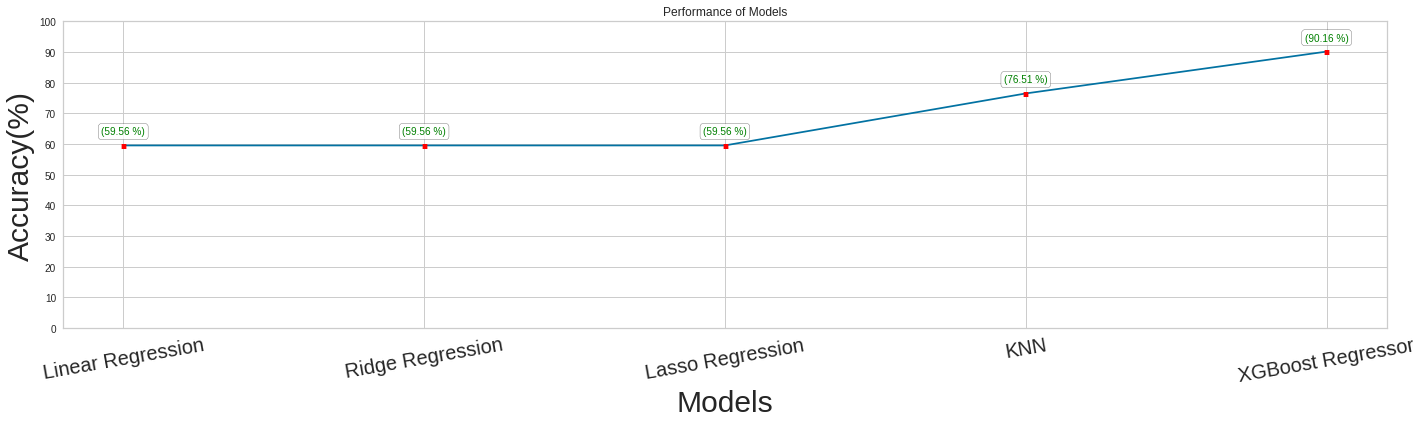

In [73]:
import matplotlib.pyplot as plt

x=list(range(len(model_accuracy)))
y=list(range(0,101,10))
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
plt.figure(figsize=(20,6))
plt.plot(model_accuracy)
plt.yticks(y)
plt.xticks(fontsize=20)
plt.xticks(rotation = (10))
plt.xlabel("Models",fontsize=30)
plt.ylabel("Accuracy(%)",fontsize=30)
plt.title("Performance of Models")
for a,b in zip(x,y):
    b=model_accuracy[a]
    val="("+str(round(model_accuracy[a],2))+" %)"
    plt.text(a, b+4.5, val,horizontalalignment='center',verticalalignment='center',color='green',bbox=props)
    plt.text(a, b+3.5, '.',horizontalalignment='center',verticalalignment='center',color='red',fontsize=50)
plt.tight_layout()
plt.savefig('Overall-Performance.jpg',dpi=600)
plt.show();